In [2]:
import numpy as np 
import os
import pandas as pd 
import matplotlib.pyplot as plt 

#Importation des bibliothèques pour de la modélisation 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

 
import kagglehub
from scipy.stats import pearsonr
import seaborn as sns
from scipy.stats import linregress

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('sustainable_fashion_trends_2024.csv')
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [4]:
def analyze_sustainability_eco_manufacturing(data):
    """
    Analyse la relation entre Sustainability_Rating et Eco_Friendly_Manufacturing en respectant l'ordre A, B, C, D.
    
    Paramètres :
        data (pd.DataFrame) : Dataset contenant les colonnes 'Sustainability_Rating' et 'Eco_Friendly_Manufacturing'.
    
    Affiche :
        Un tableau croisé dynamique montrant le nombre d'occurrences de chaque combinaison,
        ainsi qu'un graphique illustrant la relation.
    """
    # Définir l'ordre des catégories pour Sustainability_Rating
    data['Sustainability_Rating'] = pd.Categorical(data['Sustainability_Rating'], categories=['A', 'B', 'C', 'D'], ordered=True)
    
    # Créer un tableau croisé dynamique pour compter les combinaisons
    pivot_table = pd.crosstab(data['Sustainability_Rating'], data['Eco_Friendly_Manufacturing'])
    
    # Afficher le tableau croisé
    print("Tableau croisé de Sustainability_Rating et Eco_Friendly_Manufacturing:")
    print(pivot_table)
    
    # Visualiser la relation
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='Sustainability_Rating', hue='Eco_Friendly_Manufacturing', palette="viridis",
                  order=['A', 'B', 'C', 'D'])  # Spécifier l'ordre pour le graphique
    plt.title("Relation entre Sustainability Rating et Eco-Friendly Manufacturing")
    plt.xlabel("Sustainability Rating")
    plt.ylabel("Nombre de marques")
    plt.legend(title="Eco Friendly Manufacturing")
    plt.show()



Tableau croisé de Sustainability_Rating et Eco_Friendly_Manufacturing:
Eco_Friendly_Manufacturing   No  Yes
Sustainability_Rating               
A                           652  579
B                           612  666
C                           600  642
D                           616  633


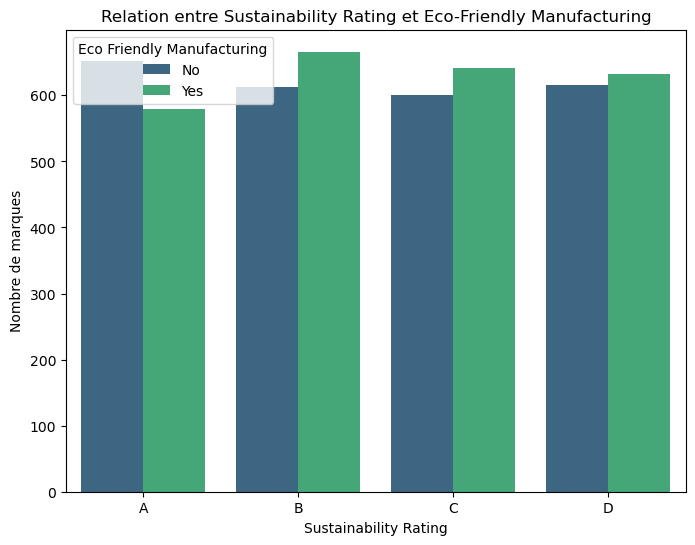

In [5]:
analyze_sustainability_eco_manufacturing(df)

In [6]:
def analyze_correlation(data, var1, var2):
    """
    Analyse la corrélation de Pearson entre deux variables spécifiées du dataset.
    
    Paramètres :
        data (pd.DataFrame) : Dataset contenant les variables à analyser.
        var1 (str) : Nom de la première colonne (variable).
        var2 (str) : Nom de la deuxième colonne (variable).
    
    Affiche :
        La corrélation de Pearson entre les deux variables spécifiées, ainsi que la p-valeur associée.
    """
    # Vérifier que les variables existent dans le dataset
    if var1 not in data.columns or var2 not in data.columns:
        raise ValueError(f"Les colonnes {var1} ou {var2} ne sont pas présentes dans le dataset.")
    
    # Convertir les variables catégorielles en numériques si nécessaire
    data_encoded = data.copy()
    if data_encoded[var1].dtype == 'object':
        data_encoded[var1] = data_encoded[var1].astype('category').cat.codes
    if data_encoded[var2].dtype == 'object':
        data_encoded[var2] = data_encoded[var2].astype('category').cat.codes
    
    # Calcul de la corrélation de Pearson
    correlation, p_value = pearsonr(data_encoded[var1], data_encoded[var2])
    
    # Afficher les résultats
    print(f"Corrélation de Pearson entre {var1} et {var2}: {correlation:.3f}")
    print(f"P-valeur: {p_value:.3f}")
    
    # Interprétation
    if p_value < 0.05:
        print("La corrélation est statistiquement significative (p < 0.05).")
    else:
        print("La corrélation n'est pas statistiquement significative (p >= 0.05).")


In [7]:
def find_significant_correlations(data, columns):
    """
    Trouve les corrélations de Pearson significatives entre les variables spécifiées.
    
    Paramètres :
        data (pd.DataFrame) : Dataset contenant les variables.
        columns (list) : Liste des noms de colonnes pour lesquelles tester les corrélations.
    
    Affiche :
        La liste des paires de variables avec une corrélation de Pearson statistiquement significative.
    """
    # Initialiser une liste pour stocker les résultats des corrélations significatives
    significant_correlations = []

    # Encoder les variables catégorielles en numériques si nécessaire
    data_encoded = data[columns].copy()
    for col in columns:
        if data_encoded[col].dtype == 'object':
            data_encoded[col] = data_encoded[col].astype('category').cat.codes
    
    # Calculer les corrélations de Pearson pour chaque paire de variables
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            var1 = columns[i]
            var2 = columns[j]
            
            # Calculer la corrélation de Pearson et la p-valeur
            correlation, p_value = pearsonr(data_encoded[var1], data_encoded[var2])
            
            # Vérifier si la corrélation est statistiquement significative
            if p_value < 0.05:
                significant_correlations.append({
                    'Variable 1': var1,
                    'Variable 2': var2,
                    'Correlation': correlation,
                    'P-Value': p_value
                })
    
    # Afficher les résultats
    if significant_correlations:
        print("Corrélations significatives trouvées :")
        for result in significant_correlations:
            print(f"{result['Variable 1']} - {result['Variable 2']} : Corrélation = {result['Correlation']:.3f}, P-valeur = {result['P-Value']:.3f}")
    else:
        print("Aucune corrélation statistiquement significative trouvée parmi les variables spécifiées.")

In [8]:
df_correlation = df.copy()
df_correlation['Sustainability_Rating'] = df_correlation['Sustainability_Rating'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4})
df_correlation['Eco_Friendly_Manufacturing'] = df_correlation['Eco_Friendly_Manufacturing'].replace({'Yes': 1, 'No': 0})
df_correlation['Recycling_Programs'] = df_correlation['Recycling_Programs'].replace({'Yes': 1, 'No': 0})
df_correlation['Market_Trend'] = df_correlation['Market_Trend'].replace({'Stable': 0, 'Growing': 1, 'Declining': 2})



/tmp/ipykernel_13671/3093054234.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_correlation['Sustainability_Rating'] = df_correlation['Sustainability_Rating'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4})
/tmp/ipykernel_13671/3093054234.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_correlation['Sustainability_Rating'] = df_correlation['Sustainability_Rating'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4})
/tmp/ipykernel_13671/3093054234.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future vers

In [9]:
columns = ['Sustainability_Rating', 'Eco_Friendly_Manufacturing', 'Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Recycling_Programs', 'Product_Lines', 'Average_Price_USD','Market_Trend']
find_significant_correlations(df_correlation, columns)

Corrélations significatives trouvées :
Eco_Friendly_Manufacturing - Market_Trend : Corrélation = 0.029, P-valeur = 0.042
Carbon_Footprint_MT - Recycling_Programs : Corrélation = -0.036, P-valeur = 0.012
Carbon_Footprint_MT - Product_Lines : Corrélation = 0.028, P-valeur = 0.046
Water_Usage_Liters - Product_Lines : Corrélation = 0.035, P-valeur = 0.013


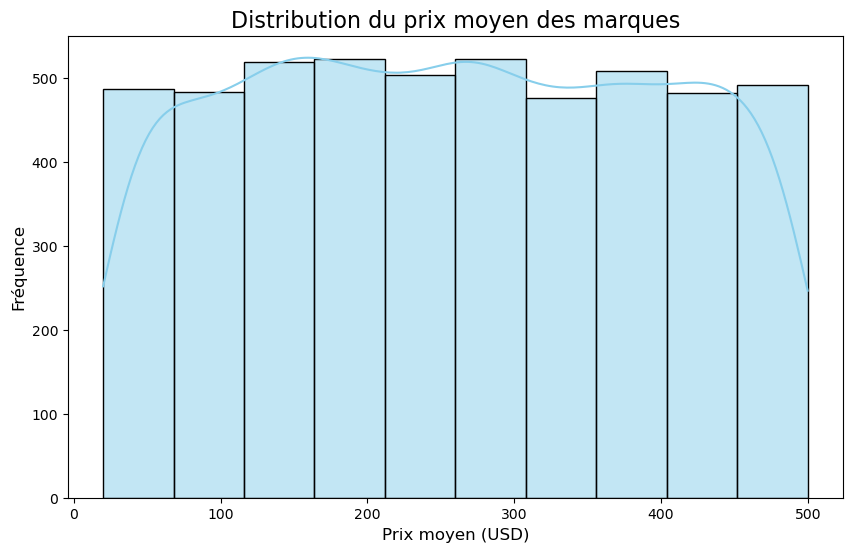

In [12]:
# Configuration de la taille du graphique
plt.figure(figsize=(10, 6))

# Affichage de l'histogramme de la distribution des prix
sns.histplot(df['Average_Price_USD'], kde=True, color='skyblue', bins=10)

# Titre et labels
plt.title("Distribution du prix moyen des marques", fontsize=16)
plt.xlabel("Prix moyen (USD)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)

# Affichage du graphique
plt.show()

In [13]:
df['Price_Category'] = pd.cut(df["Average_Price_USD"],
                              bins=[0, 35, 60, float('inf')],
                              labels=["0-35 USD", "35-60 USD", "Above 60 USD"])

# Calculer l'impact carbone moyen pour chaque catégorie
carbon_impact_by_category = df.groupby('Price_Category')['Carbon_Footprint_MT'].mean()

# Afficher les résultats
print("Impact carbone moyen par catégorie de prix :")
print(carbon_impact_by_category)

Impact carbone moyen par catégorie de prix :
Price_Category
0-35 USD        254.642410
35-60 USD       242.119414
Above 60 USD    250.619166
Name: Carbon_Footprint_MT, dtype: float64


/tmp/ipykernel_13671/3929079007.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carbon_impact_by_category = df.groupby('Price_Category')['Carbon_Footprint_MT'].mean()
